In [1]:
from google.colab import drive
drive.mount('/content/drive/')

print("Google Drive mounted successfully")


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/
Google Drive mounted successfully


In [0]:
from fastai.vision import *

In [0]:
path = Path('/content/drive/My Drive/Apron/') # Define path to the image folders

np.random.seed(42)

data = ImageDataBunch.from_folder(path, 
                                  train=".", 
                                  valid_pct=0.2,                                
                                  ds_tfms=get_transforms(), 
                                  size=(256,256), 
                                  num_workers=4, 
                                  bs = 16) \
        .normalize(imagenet_stats)

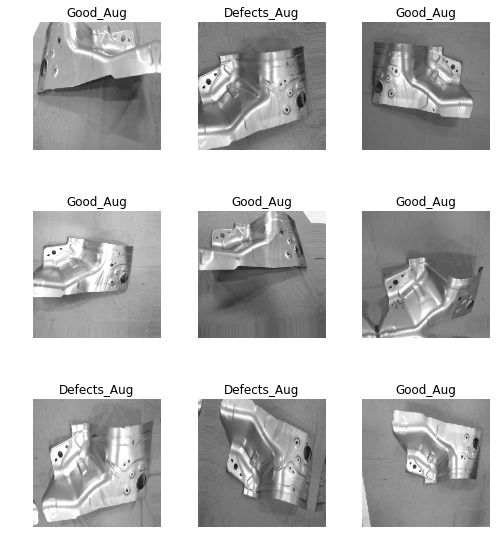

In [4]:
data.show_batch(rows=3, figsize=(7,8))

In [7]:
print(data.c, data.classes, len(data.train_ds), len(data.valid_ds))

2 ['Defects_Aug', 'Good_Aug'] 1744 436


In [8]:
learn = cnn_learner(data, 
                    models.resnet18, 
                    metrics=error_rate) #error_rate = (1 - accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:00<00:00, 85082236.44it/s]


In [11]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.279749,0.146596,0.059633,08:15


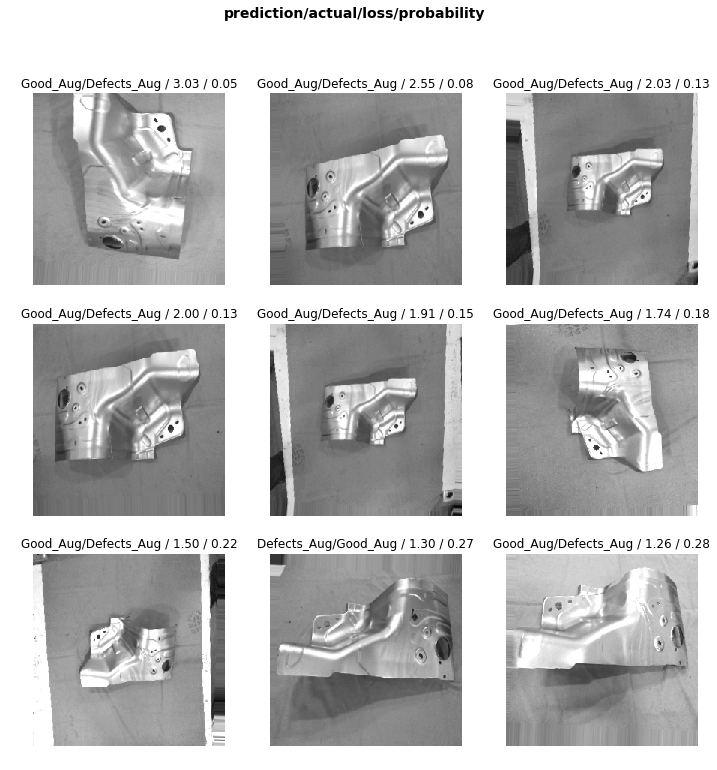

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9)

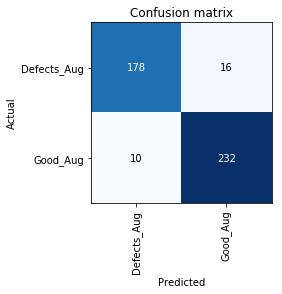

In [13]:
interp.plot_confusion_matrix()

In [15]:
print('Accuracy is: ', 410/436)

Accuracy is:  0.9403669724770642
